In [1]:
!mkdir csv_files
!mkdir outputs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()

In [4]:
fear_greed_df = pd.read_csv("/content/fear_greed_index.csv")
trades_df = pd.read_csv("/content/historical_data.csv")

print(fear_greed_df.head())
print(trades_df.head())


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

/tmp/ipython-input-1395352123.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades_df = pd.read_csv("/content/historical_data.csv")


In [5]:
print("Fear & Greed Info")
print(fear_greed_df.info())

print("\nTrader Data Info")
print(trades_df.info())


Fear & Greed Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None

Trader Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88467 entries, 0 to 88466
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           88467 non-null  object 
 1   Coin              88466 non-null  object 
 2   Execution Price   88466 non-null  float64
 3   Size Tokens       88466 non-null  float64
 4   Size USD          88466 non-null  float64
 5   Side              88466 non-null  object 
 6   Timestamp IST     88466 non-null  object 
 7   S

In [13]:
fear_greed_df["date"] = pd.to_datetime(fear_greed_df["date"])
fear_greed_df["classification"] = fear_greed_df["classification"].str.lower()


In [14]:
trades_df = trades_df.rename(columns={
    "Execution Price": "execution_price",
    "Size Tokens": "size_tokens",
    "Size USD": "size_usd",
    "Side": "side",
    "Timestamp IST": "time",
    "Closed PnL": "closed_pnl"
})


In [15]:
trades_df["time"] = pd.to_datetime(
    trades_df["time"],
    dayfirst=True,
    errors="coerce"
)


In [16]:
trades_df["trade_date"] = trades_df["time"].dt.date
trades_df["trade_date"] = pd.to_datetime(trades_df["trade_date"])


In [17]:
numeric_cols = ["execution_price", "size_tokens", "size_usd", "closed_pnl"]

for col in numeric_cols:
    trades_df[col] = pd.to_numeric(trades_df[col], errors="coerce")


In [18]:
trades_df.dropna(
    subset=["execution_price", "size_tokens", "size_usd", "closed_pnl"],
    inplace=True
)


In [19]:
trades_df["trade_volume"] = trades_df["size_usd"].abs()

trades_df["is_profitable"] = trades_df["closed_pnl"] > 0

trades_df["direction"] = trades_df["side"].str.lower().map({
    "buy": "long",
    "sell": "short"
})


In [20]:
print(trades_df.head())
print(trades_df.info())


                                      Account  Coin  execution_price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   size_tokens  size_usd side                time  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   closed_pnl                                   Transaction Hash  \
0         0.0  0xec09451

In [23]:
merged_df = trades_df.merge(
    fear_greed_df,
    left_on="trade_date",
    right_on="date",
    how="inner"
)

merged_df.head()


,Account,Coin,execution_price,size_tokens,size_usd,side,time,Start Position,Direction,closed_pnl,...,Trade ID,Timestamp,trade_date,trade_volume,is_profitable,direction,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,8.950000e+14,1.730000e+12,2024-12-02,7872.16,False,long,1733117400,80,extreme greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,4.430000e+14,1.730000e+12,2024-12-02,127.68,False,long,1733117400,80,extreme greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,6.600000e+14,1.730000e+12,2024-12-02,1150.63,False,long,1733117400,80,extreme greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,1.080000e+15,1.730000e+12,2024-12-02,1142.04,False,long,1733117400,80,extreme greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,1.050000e+15,1.730000e+12,2024-12-02,69.75,False,long,1733117400,80,extreme greed,2024-12-02


In [24]:
merged_df.to_csv("csv_files/cleaned_trades.csv", index=False)


In [26]:
pnl_summary = merged_df.groupby("classification")["closed_pnl"].agg(
    avg_pnl="mean",
    median_pnl="median",
    total_pnl="sum"
)

win_rate = merged_df.groupby("classification")["is_profitable"].mean() * 100

print(pnl_summary)
print("\nWin Rate (%)")
print(win_rate)


                   avg_pnl  median_pnl     total_pnl
classification                                      
extreme fear     76.680902    0.000000  5.701225e+05
extreme greed   121.900517    0.133651  1.732572e+06
fear             81.463878    0.000000  2.497438e+06
greed            77.679216    0.000000  1.570208e+06
neutral          71.859323    0.000000  1.145509e+06

Win Rate (%)
classification
extreme fear     37.067922
extreme greed    51.058890
fear             45.976449
greed            40.724251
neutral          46.565460
Name: is_profitable, dtype: float64


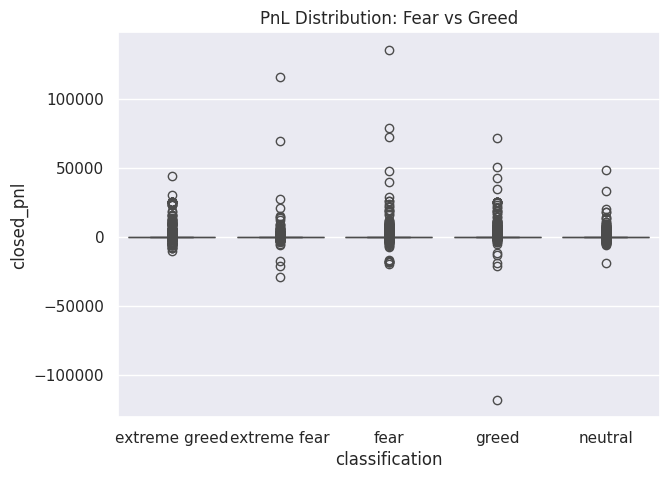

In [28]:
plt.figure(figsize=(7,5))
sns.boxplot(data=merged_df, x="classification", y="closed_pnl")
plt.title("PnL Distribution: Fear vs Greed")
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()


In [29]:
volume_summary = merged_df.groupby("classification")["trade_volume"].agg(
    avg_volume="mean",
    total_volume="sum"
)

print(volume_summary)


                  avg_volume  total_volume
classification                            
extreme fear     5266.810243  3.915873e+07
extreme greed    5961.550044  8.473151e+07
fear            10797.609767  3.310223e+08
greed           11204.017334  2.264780e+08
neutral          8011.832792  1.277166e+08


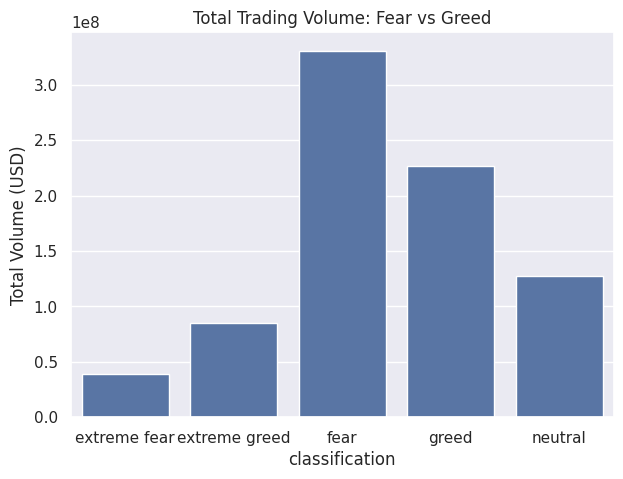

In [30]:
plt.figure(figsize=(7,5))
sns.barplot(
    x=volume_summary.index,
    y=volume_summary["total_volume"]
)
plt.title("Total Trading Volume: Fear vs Greed")
plt.ylabel("Total Volume (USD)")
plt.savefig("outputs/volume_vs_sentiment.png")
plt.show()


In [31]:
direction_bias = (
    merged_df
    .groupby(["classification", "direction"])
    .size()
    .unstack()
)

direction_bias_percentage = (
    direction_bias
    .div(direction_bias.sum(axis=1), axis=0) * 100
)

print(direction_bias_percentage)


direction            long      short
classification                      
extreme fear    57.014122  42.985878
extreme greed   46.957011  53.042989
fear            49.293799  50.706201
greed           46.690413  53.309587
neutral         51.395772  48.604228


In [32]:
merged_df["risk_adjusted_return"] = (
    merged_df["closed_pnl"] / merged_df["trade_volume"]
)

risk_adjusted_summary = merged_df.groupby(
    "classification"
)["risk_adjusted_return"].mean()

print(risk_adjusted_summary)


classification
extreme fear     0.010233
extreme greed    0.031997
fear             0.017345
greed            0.029114
neutral          0.020004
Name: risk_adjusted_return, dtype: float64


In [33]:
daily_metrics = merged_df.groupby(
    ["trade_date", "classification"]
).agg(
    total_pnl=("closed_pnl", "sum"),
    total_volume=("trade_volume", "sum"),
    avg_trade_size=("trade_volume", "mean")
).reset_index()

daily_metrics.to_csv("csv_files/daily_metrics.csv", index=False)
